In [1]:
import altair as alt
from collections import defaultdict
import json
import numpy as np
import pandas as pd

In [2]:
preferences = pd.read_csv("../data/dms-h3n2-preferences-rescaled.csv")

In [3]:
preferences.head()

,site,A,C,D,E,F,G,H,I,K,...,P,Q,R,S,T,V,W,Y,entropy,neffective
0,-16,0.014871,0.085098,0.136767,0.037090,0.025928,0.020988,0.011305,0.082474,0.147416,...,0.000107,0.022513,0.043732,0.010125,0.026076,0.026601,0.039734,0.074225,2.675247,14.515938
1,-15,0.000842,0.005272,0.005332,0.002805,0.038745,0.000387,0.035235,0.172027,0.262394,...,0.000922,0.019696,0.048044,0.003923,0.010624,0.047450,0.083409,0.110740,2.275608,9.733835
2,-14,0.006965,0.068999,0.010278,0.029151,0.028980,0.000074,0.031234,0.020222,0.048197,...,0.060473,0.065088,0.060442,0.039089,0.080455,0.012755,0.092659,0.127560,2.664450,14.360048
3,-13,0.177685,0.180615,0.002740,0.011457,0.023248,0.049499,0.013153,0.062442,0.039223,...,0.013630,0.008927,0.002066,0.028406,0.015607,0.206730,0.005484,0.084061,2.376940,10.771889
4,-12,0.017543,0.014953,0.002865,0.000621,0.080053,0.061449,0.000202,0.165689,0.005086,...,0.000415,0.001055,0.000668,0.009665,0.016923,0.005231,0.485037,0.036957,1.784825,5.958536


In [4]:
entropy = preferences.loc[:, ["site", "entropy", "neffective"]]

In [5]:
entropy.head()

,site,entropy,neffective
0,-16,2.675247,14.515938
1,-15,2.275608,9.733835
2,-14,2.664450,14.360048
3,-13,2.376940,10.771889
4,-12,1.784825,5.958536


In [6]:
entropy.shape

(566, 3)

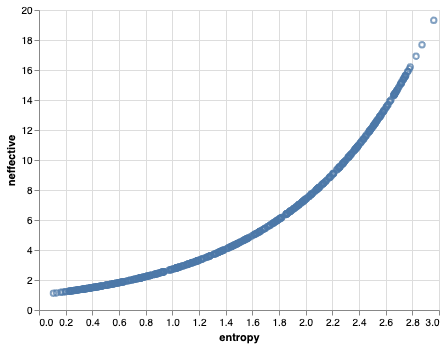

In [7]:
alt.Chart(entropy).mark_point().encode(
    x="entropy:Q",
    y="neffective:Q"
)

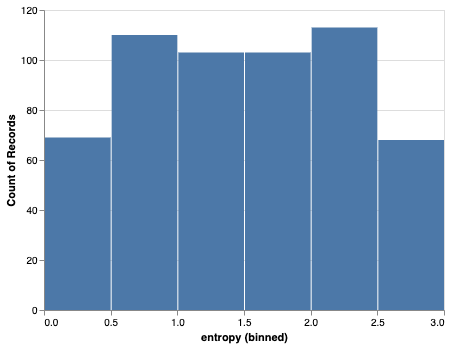

In [8]:
alt.Chart(entropy).mark_bar().encode(
    x=alt.X("entropy:Q", bin=True),
    y="count():Q"
)

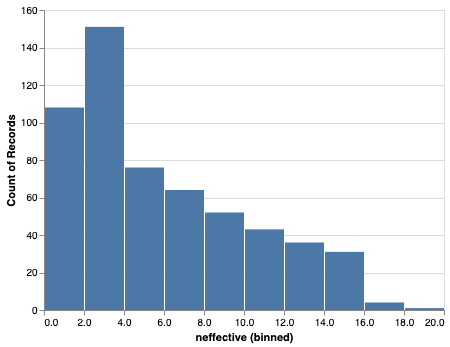

In [9]:
alt.Chart(entropy).mark_bar().encode(
    x=alt.X("neffective:Q", bin=True),
    y="count():Q"
)

In [10]:
entropy.describe()

,entropy,neffective
count,566.000000,566.000000
mean,1.503237,5.932688
std,0.768871,4.260099
min,0.108294,1.114375
25%,0.814336,2.257704
50%,1.503502,4.497415
75%,2.180422,8.850047
max,2.960734,19.312147


In [11]:
(entropy["neffective"] < 4.5).sum()

283

In [12]:
entropy["intolerant"] = entropy["neffective"] < 4.5

In [13]:
(entropy["entropy"] < 0.82).sum()

142

In [14]:
entropy["sensitivity"] = (20 - entropy["neffective"]) / 20.0

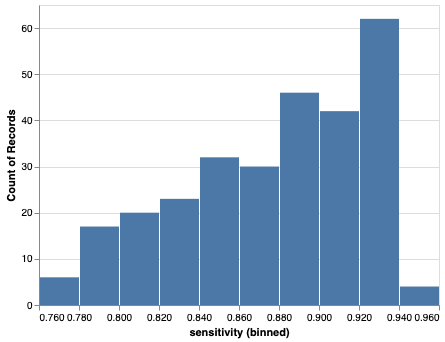

In [15]:
alt.Chart(entropy.query("entropy < 1.5")).mark_bar().encode(
    x=alt.X("sensitivity:Q", bin=True),
    y="count():Q"
)

In [16]:
entropy.head()

,site,entropy,neffective,intolerant,sensitivity
0,-16,2.675247,14.515938,False,0.274203
1,-15,2.275608,9.733835,False,0.513308
2,-14,2.664450,14.360048,False,0.281998
3,-13,2.376940,10.771889,False,0.461406
4,-12,1.784825,5.958536,False,0.702073


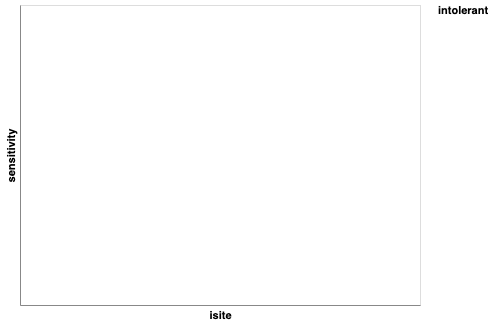

In [17]:
alt.Chart(entropy).mark_point().encode(
    x="isite:Q",
    y="sensitivity:Q",
    color="intolerant:N"
)

In [18]:
entropy["standardized_entropy"] = (entropy["entropy"] - entropy["entropy"].mean()) / entropy["entropy"].std()

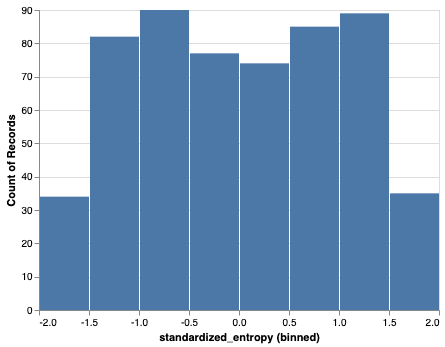

In [19]:
alt.Chart(entropy).mark_bar().encode(
    x=alt.X("standardized_entropy:Q", bin=True),
    y="count():Q"
)

In [20]:
entropy["isite"] = np.arange(entropy.shape[0])

In [21]:
entropy.head(20)

,site,entropy,neffective,intolerant,sensitivity,standardized_entropy,isite
0,-16,2.675247,14.515938,False,0.274203,1.524326,0
1,-15,2.275608,9.733835,False,0.513308,1.004552,1
2,-14,2.664450,14.360048,False,0.281998,1.510283,2
3,-13,2.376940,10.771889,False,0.461406,1.136345,3
4,-12,1.784825,5.958536,False,0.702073,0.366235,4
5,-11,1.900297,6.687879,False,0.665606,0.516419,5
6,-10,2.489481,12.055013,False,0.397249,1.282716,6
7,-9,2.491250,12.076361,False,0.396182,1.285017,7
8,-8,2.735816,15.422331,False,0.228883,1.603103,8
9,-7,2.433530,11.399050,False,0.430048,1.209946,9


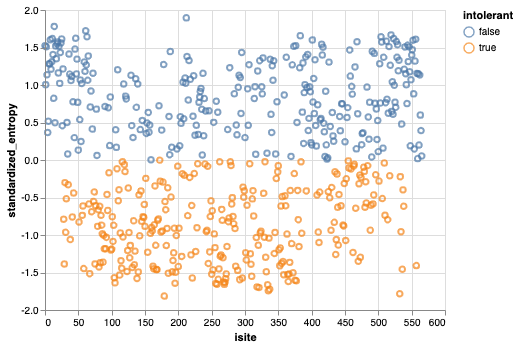

In [22]:
alt.Chart(entropy).mark_point().encode(
    x="isite:Q",
    y="standardized_entropy:Q",
    color="intolerant:N"
)

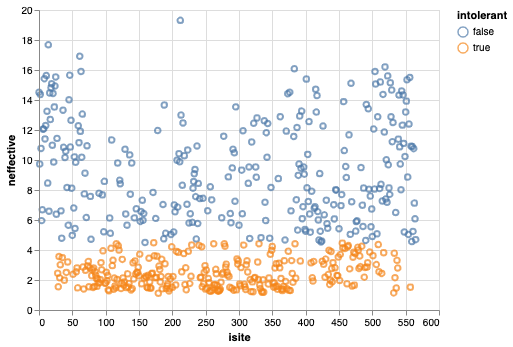

In [23]:
alt.Chart(entropy).mark_point().encode(
    x="isite:Q",
    y="neffective:Q",
    color="intolerant:N"
)

In [24]:
entropy[entropy["site"].isin(["145", "155", "156", "158", "159", "189", "193"])]

,site,entropy,neffective,intolerant,sensitivity,standardized_entropy,isite
160,145,0.811536,2.251363,True,0.887432,-0.899632,160
170,155,0.899656,2.458756,True,0.877062,-0.785023,170
171,156,2.059254,7.840122,False,0.607994,0.723161,171
173,158,1.286413,3.619778,True,0.819011,-0.282003,173
174,159,0.765405,2.149866,True,0.892507,-0.959629,174
204,189,1.879319,6.549041,False,0.672548,0.489135,204
208,193,1.925762,6.860376,False,0.656981,0.549540,208


In [25]:
(entropy["standardized_entropy"] < 0).sum()

283

In [26]:
entropy["intolerant"].sum()

283

In [27]:
entropy.head(1)

,site,entropy,neffective,intolerant,sensitivity,standardized_entropy,isite
0,-16,2.675247,14.515938,False,0.274203,1.524326,0


In [28]:
dms_nonepitope_map = {
    "default": 0,
    "map": defaultdict(dict),
    "name": "dms_nonepitope"
}

for value in entropy.loc[entropy["standardized_entropy"] < 0, "site"].values:
    if value.startswith("(HA2)"):
        gene = "HA2"
        site = value.replace("(HA2)", "")
    else:
        if int(value) < 0:
            # SigPep
            gene = "SigPep"
            site = str(int(value) + 17)
        else:
            # HA1
            gene = "HA1"
            site = value
            
    dms_nonepitope_map["map"][gene][site] = 1

In [29]:
with open("../config/distance_maps/h3n2/ha/dms_nonepitope.json", "w") as oh:
    json.dump(dms_nonepitope_map, oh, indent=1)

In [32]:
dms_entropy_map = {
    "default": 0,
    "map": defaultdict(dict),
    "name": "dms_entropy"
}

for value, standardized_entropy in entropy.loc[:, ["site", "standardized_entropy"]].values:
    if value.startswith("(HA2)"):
        gene = "HA2"
        site = value.replace("(HA2)", "")
    else:
        if int(value) < 0:
            # SigPep
            gene = "SigPep"
            site = str(int(value) + 17)
        else:
            # HA1
            gene = "HA1"
            site = value
            
    dms_entropy_map["map"][gene][site] = np.around(standardized_entropy, 2)

In [34]:
with open("../config/distance_maps/h3n2/ha/dms_entropy.json", "w") as oh:
    json.dump(dms_entropy_map, oh, indent=1)